# Geometric Transformations

## Affine Transformations

An affine transformation is a fundamental concept in image processing used to represent various geometric operations. It combines linear transformations (matrix multiplication) with translations (vector addition) to achieve versatile effects {cite:p}`OpenCVDocumentation`:

1. **Rotations**: Employing linear transformations to rotate the image.
2. **Translations**: Achieved by adding a vector, effectively shifting the image.
3. **Scale Operations**: Applying linear transformations to resize the image.

At its core, an affine transformation describes the relationship between two images. This transformation is typically represented by a 2x3 matrix {cite:p}`OpenCVDocumentation`:

\begin{equation}
A = \begin{bmatrix} a_{00} & a_{01} \\ a_{10} & a_{11} \end{bmatrix}_{2 \times 2} \quad B = \begin{bmatrix} b_{00} \\ b_{10} \end{bmatrix}_{2 \times 1}
\end{equation}

We combine these matrices to form a 2x3 matrix:

\begin{equation}
M = \begin{bmatrix} A & B \end{bmatrix} = \begin{bmatrix} a_{00} & a_{01} & b_{00} \\ a_{10} & a_{11} & b_{10} \end{bmatrix}_{2 \times 3}
\end{equation}

To transform a 2D vector $X = \begin{bmatrix} x \\ y \end{bmatrix}$ using A and B, we can use:

\begin{equation}
T = A \cdot X + B
\end{equation}

This results in:

\begin{equation}
T = \begin{bmatrix} a_{00}x + a_{01}y + b_{00} \\ a_{10}x + a_{11}y + b_{10} \end{bmatrix}
\end{equation}

Affine transformations provide a powerful framework for image manipulation, enabling operations such as rotation, translation, scaling, and more. They form the basis for transforming images efficiently and systematically.


* **Translation Transformations:**

\begin{equation}
A = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}_{2 \times 2} \quad B = \begin{bmatrix} b_{00} \\ b_{10} \end{bmatrix}_{2 \times 1}
\end{equation}


* **Rotation Transformations (for positive angles being clockwise rotations:)**

\begin{equation}
A = \begin{bmatrix} \cos(\theta) & -\sin(\theta) \\ \sin(\theta) & \cos(\theta) \end{bmatrix}_{2 \times 2} \quad B = \begin{bmatrix} 0 \\ 0 \end{bmatrix}_{2 \times 1}
\end{equation}

* **Scaling Transformations:**
\begin{equation}
A = \begin{bmatrix} a_{00} & 0 \\ 0 & a_{11} \end{bmatrix}_{2 \times 2} \quad B = \begin{bmatrix} b_{00} \\ b_{10} \end{bmatrix}_{2 \times 1}
\end{equation}

### How to Derive an Affine Transformation?

An Affine Transformation represents a fundamental relationship between two images. This connection can be established through different means, generally falling into two categories {cite:p}`OpenCVDocumentation`:

1. **When We Know Both X and T**: In this scenario, we possess knowledge about both sets of points, X and T, and we are aware that these points are related. Our objective is to find the transformation matrix, denoted as M.

2. **When We Know X and M**: If we have information about the transformation matrix M and the original set of points X, we can easily obtain the transformed set of points T by applying the transformation equation T = M⋅X. This information for M can either be explicit, represented as a 2-by-3 matrix, or it may be inferred from a geometric relationship between points.

To elucidate the concept further, let's delve into the scenario described in point (b). When M is the relationship that connects two images, we can analyze the simplest case where M relates three distinct points in both images. Consider the visual representation below {cite:p}`OpenCVDocumentation`:

```{figure} Warp_Affine_0.png
---
width: 400px
align: center
---
Image courtesy of {cite:p}`OpenCVDocumentation`.
```

In the image, points 1, 2, and 3 form a triangle in image 1. This same triangle, when mapped into image 2 through the Affine Transformation, undergoes a noticeable change. By determining the Affine Transformation using these three chosen points (which can be selected as needed), we can establish this discovered relationship for all pixels within an image.

This methodology empowers us to apply the same transformation across the entire image, enabling geometric alterations such as rotations, translations, and scaling. Understanding this relationship between points and the transformation matrix forms the foundation for systematically manipulating images with Affine Transformations.

### getAffineTransform

The function `cv2.getAffineTransform(src, dst)` is a part of the OpenCV library in Python, and it's used to calculate the Affine Transformation matrix that maps points from one plane (source, `src`) to another plane (destination, `dst`). The Affine Transformation is a linear transformation that involves rotation, translation, and scaling. This transformation matrix can then be used to warp or transform images, shapes, or sets of points from the source plane to the destination plane {cite:p}`opencv_library, OpenCVDocumentation`.

Here's a breakdown of the function parameters and return value:

1. `src`: The source points, which is a 3x2 array of floating-point coordinates representing the original points in the source plane. It should contain three points (rows), each with two coordinates (columns).

2. `dst`: The destination points, which is also a 3x2 array of floating-point coordinates. These represent the corresponding points in the destination plane. Just like the source points, it should contain three points with two coordinates each.

The function calculates the Affine Transformation matrix that best maps the source points to the destination points. This matrix is denoted by the return value `retval`, which is a 2x3 floating-point matrix representing the transformation. The `retval` matrix can be used for various purposes, such as warping images using `cv2.warpAffine()` or transforming sets of points.

To use the Affine Transformation matrix obtained from `cv2.getAffineTransform()`, you'll typically apply it to an image or points using the `cv2.warpAffine()` function, which performs the actual transformation. This function uses the calculated matrix to apply the transformation to the image or points. You can find the full description of this function [here](https://docs.opencv.org/3.4/d4/d61/tutorial_warp_affine.html).

In [2]:
# Import necessary libraries
import matplotlib.pyplot as plt  # Import the plotting library

# Set font properties for plots
plt.rcParams.update({'font.family': 'Calibri', 'axes.titlesize': 16})

# Define a function to display images with titles and optional settings
def ImShow(Images, Names, title='Images', grayscale=False):
    # Create a figure with two subplots
    fig, ax = plt.subplots(1, 2, figsize=(9.5, 4))  # Create a figure with 1 row and 2 columns of subplots
    ax = ax.ravel()  # Flatten the subplots for easier manipulation

    # Iterate over the first two images
    for i in range(2):
        # Display the image in grayscale if grayscale is True, otherwise in color
        ax[i].imshow(Images[i], cmap='gray' if grayscale else None)
        ax[i].set_aspect(1)  # Set aspect ratio to 1 (square aspect)
        ax[i].axis('off')  # Turn off axis
        ax[i].set_title(Names[i], weight='bold')  # Set image title with bold font

    if title:
        # Set main title if provided
        fig.suptitle(title, weight='bold', fontsize=18)

    plt.tight_layout()  # Adjust layout for better spacing

    return fig, ax

### Image Wrap

The function you're referring to, `cv2.warpAffine()`, is part of the OpenCV library, which is a popular computer vision and image processing library in Python. This specific function is used for geometric image transformations, particularly affine transformations. Let's break down the parameters and its purpose:

```
cv2.warpAffine(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]]) → dst
```

Here's what each parameter does:

1. `src`: This is the input image, which is the source image you want to apply the transformation to. It should be a NumPy array (image) in most cases.

2. `M`: This parameter represents the transformation matrix. It's a 2x3 matrix that defines the affine transformation. The matrix includes parameters like scaling, rotation, translation, and shearing. The transformation matrix `M` is used to specify how each pixel in the source image should be mapped to the destination image.

3. `dsize`: This is the size (width and height) of the output image (destination image) you want to create after applying the transformation. It's specified as a tuple (width, height).

4. `dst` (optional): This is the output image where the transformed image will be stored. If not provided, a new image will be created to store the result.

5. `flags` (optional): This parameter specifies the interpolation method to be used during the transformation. Different methods can be used to determine the pixel values of the output image at locations that do not exactly map to locations in the source image.

6. `borderMode` (optional): This parameter determines how to handle pixels that fall outside the boundaries of the source image. It defines the border mode.

7. `borderValue` (optional): When a pixel is outside the source image boundaries, this parameter specifies the value that should be used for the pixel.

8. `→ dst`: This indicates that the function returns the destination image, which contains the result of the affine transformation.

You can find the full description of this function [here](https://docs.opencv.org/3.4/d4/d61/tutorial_warp_affine.html).

<font color='Blue'><b>Example</b></font>: 
In this illustrative code snippet, we showcase Affine Image Transformation using `cv2.getAffineTransform` in Python, including the definition of source and destination points, calculation of the Affine Transformation matrix, and visualization of the original and transformed images. We use the sklearn [image dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_sample_images.html#sklearn.datasets.load_sample_images) to demonstrate basic operations using Open CV.

Affine Transformation Matrix (M) = [[  1.27   0.6  -83.33]
 [ -0.33   1.    66.67]]


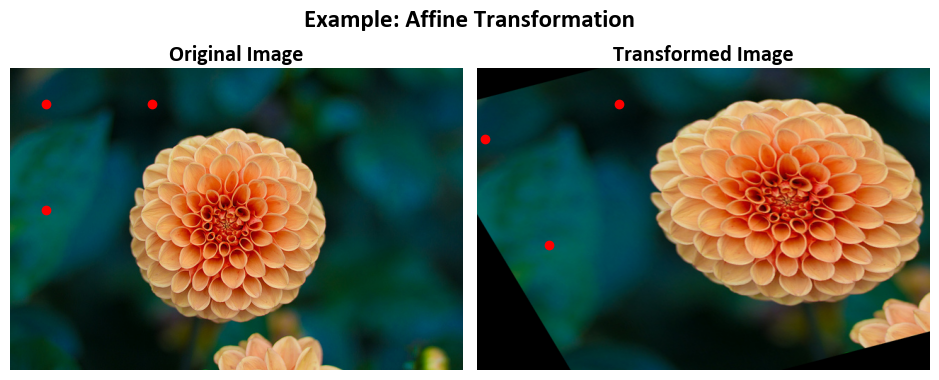

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image

# Load an example image
Img = load_sample_image('flower.jpg')
rows, cols, _ = Img.shape

# Define the source points (original triangle)
src_pts = np.float32([[50, 50],
                      [200, 50],
                      [50, 200]])

# Define the destination points (how the triangle should be transformed)
dst_pts = np.float32([[10, 100],
                      [200, 50],
                      [100, 250]])

# Calculate the Affine Transformation matrix using cv2.getAffineTransform
M = cv2.getAffineTransform(src_pts, dst_pts).round(2)
print('Affine Transformation Matrix (M) =', M)

# Apply the Affine Transformation to the image
Out = cv2.warpAffine(Img, M, (cols, rows))

# Display the original and transformed images with titles
fig, ax = ImShow(Images=[Img, Out],
                 Names=['Original Image', 'Transformed Image'],
                 title='Example: Affine Transformation', grayscale=False)

# Mark the source and destination points on the images
_ = ax[0].scatter(src_pts[:, 0], src_pts[:, 1], color='red')  # Mark source points on the original image
_ = ax[1].scatter(dst_pts[:, 0], dst_pts[:, 1], color='red')  # Mark destination points on the transformed image

Given an input 2D vector $\mathbf{X} = \begin{bmatrix} x \\ y \end{bmatrix}$, the transformation $T$ can be expressed as:

\begin{equation}
\begin{bmatrix}
x' \\
y'
\end{bmatrix}
=
M \cdot \mathbf{X}
\end{equation}

Where:

- $M$ is the 2x3 matrix you provided:

\begin{equation}
M =
\begin{bmatrix}
1.27 & 0.6 & -83.33 \\
-0.33 & 1.0 & 66.67
\end{bmatrix}
\end{equation}

- $\mathbf{X}$ is the input vector:

\begin{equation}
\mathbf{X} =
\begin{bmatrix}
x \\
y
\end{bmatrix}
\end{equation}

- $x'$ and $y'$ are the transformed coordinates, which are the result of applying the affine transformation $T$ to the input vector $\mathbf{X}$.

To calculate $x'$ and $y'$, you perform the matrix multiplication as follows:

\begin{equation}
\begin{bmatrix}
x' \\
y'
\end{bmatrix}
=
\begin{bmatrix}
1.27 & 0.6 & -83.33 \\
-0.33 & 1.0 & 66.67
\end{bmatrix}
\begin{bmatrix}
x \\
y
\end{bmatrix}
\end{equation}

- $[x, y]$ represents a point in the original 2D plane, typically corresponding to a pixel location in the original image.

- $[x', y']$ represents the transformed point in the 2D plane, which corresponds to the new location of the pixel after applying the affine transformation.

$[x, y]$ are the coordinates of a point in the original image, and $[x', y']$ are the coordinates of the corresponding point in the transformed image after the affine transformation has been applied using the matrix $M$.

***

This code demonstrates how to perform an affine transformation on an image using OpenCV. Let's break down the code and explain each part:

1. **Importing Libraries**:
   - The code imports the necessary libraries: `cv2` (OpenCV), `numpy` as `np`, `matplotlib.pyplot` as `plt`, `load_sample_image` from `sklearn.datasets` to load a sample image, and `pprint` for pretty-printing the transformation matrix.

2. **Loading an Example Image**:
   - `Img` is loaded with an example image named 'flower.jpg'. The dimensions of the image are obtained using `Img.shape`, which returns the number of rows, columns, and channels.

3. **Defining Source and Destination Points**:
   - `src_pts` defines a set of source points, which represent the original positions of a triangle in the image. Each point is specified as (x, y) coordinates in pixel units.
   - `dst_pts` defines a set of destination points, indicating where the corresponding source points should be transformed to after the affine transformation.

4. **Calculating the Affine Transformation Matrix**:
   - `cv2.getAffineTransform(src_pts, dst_pts)` calculates the affine transformation matrix (`M`) that maps the source points to the destination points. This matrix describes how the original triangle should be transformed to match the positions specified by the destination points.
   - The calculated matrix `M` is printed using `pprint(M)` to display its values.

5. **Applying the Affine Transformation**:
   - `cv2.warpAffine(Img, M, (cols, rows))` applies the affine transformation to the original image (`Img`) using the transformation matrix `M`. The result is stored in the variable `Out`.

6. **Displaying Images**:
   - The code uses a custom function `ImShow` (not defined in the provided code snippet) to display both the original and transformed images side by side. Titles are assigned to each image.

7. **Marking Source and Destination Points**:
   - Red dots are added to both images to mark the source points on the original image (`ax[0]`) and the destination points on the transformed image (`ax[1]`).

The mathematics behind the transformation:
- The affine transformation matrix `M` represents a linear transformation that includes scaling, rotation, and translation.
- It is a 2x3 matrix with elements (a, b, c, d, tx, ty) that describe how the original triangle is scaled (a, d), rotated (b, c), and translated (tx, ty) to match the destination points.

<font color='Blue'><b>Example</b></font>:
In this example, we demonstrate 2D Image Translation using `cv2.warpAffine` in Python, showcasing the translation of an image with specified values of tx = 10 and ty = 20 and displaying both the original and transformed images with informative labels. We utilize the [image dataset function](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_sample_images.html#sklearn.datasets.load_sample_images) from scikit-learn to showcase fundamental image manipulation operations using OpenCV.

Transformation Matrix (M) = [[ 1.  0. 10.]
 [ 0.  1. 20.]]


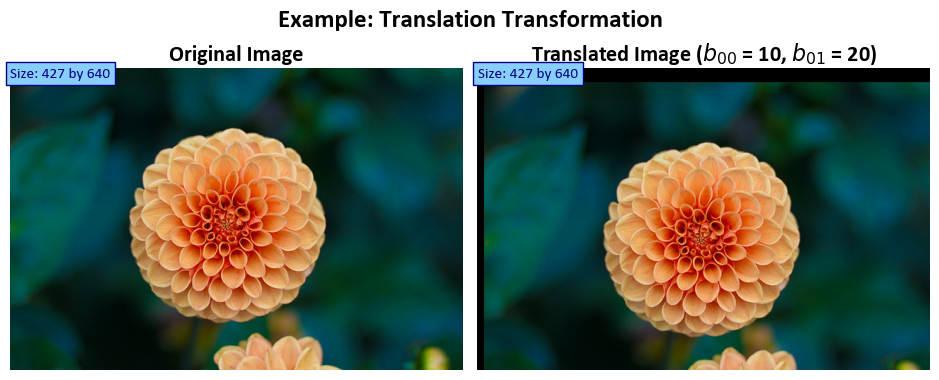

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image

# Load the sample image
Img = load_sample_image('flower.jpg')
rows, cols, _ = Img.shape

# Define a function to create a 2D translation matrix
def map_matrix(tx, ty):
    """
    Create a 2D translation matrix.

    Args:
        tx (float): Translation amount in the x-direction.
        ty (float): Translation amount in the y-direction.

    Returns:
        np.ndarray: A 2x3 transformation matrix for translation.
    """
    # Create a 2x3 transformation matrix with translation values (tx, ty)
    M = np.eye(3, dtype=float)[:2, :]
    M[:, -1] = [tx, ty]
    return M

# Apply the affine transformation to the image using warpAffine
# with translation values tx = 10 and ty = 20
tx = 10
ty = 20
M = map_matrix(tx, ty)
print('Transformation Matrix (M) =', M)
Out = cv2.warpAffine(Img, M, (cols, rows))

# Display the original and transformed images with titles
fig, ax = ImShow([Img, Out], 
                 ['Original Image', 'Translated Image ($b_{00}$ = %i, $b_{01}$ = %i)' % (tx, ty)],
                 title='Example: Translation Transformation')
    
# Add text indicating the size of the original and transformed images
_ = ax[0].text(x=0, y=int(0.02 * Img.shape[1]), s=f'Size: {Img.shape[0]} by {Img.shape[1]}',
               size=11, color='Navy', bbox=dict(boxstyle="square", ec='Navy', fc='LightSkyBlue'))
_ = ax[1].text(x=0, y=int(0.02 * Out.shape[1]), s=f'Size: {Out.shape[0]} by {Out.shape[1]}',
               size=11, color='Navy', bbox=dict(boxstyle="square", ec='Navy', fc='LightSkyBlue'))

Given an input 2D vector $\mathbf{X} = \begin{bmatrix} x \\ y \end{bmatrix}$, the transformation $T$ can be expressed as:

\begin{equation}
\begin{bmatrix}
x' \\
y'
\end{bmatrix}
=
M \cdot \mathbf{X}
\end{equation}

Where:

- $M$ is the 2x3 translation matrix created in the `map_matrix` function:

\begin{equation}
M =
\begin{bmatrix}
1 & 0 & tx \\
0 & 1 & ty
\end{bmatrix}
\end{equation}

- $\mathbf{X}$ is the input vector:

\begin{equation}
\mathbf{X} =
\begin{bmatrix}
x \\
y
\end{bmatrix}
\end{equation}

- $x'$ and $y'$ are the transformed coordinates, which are the result of applying the translation transformation $T$ to the input vector $\mathbf{X}$.

In this specific code:

- $tx$ and $ty$ are the translation amounts in the x and y directions, respectively. These values are set to 10 and 20 in the code.
- The `map_matrix` function creates the translation matrix $M$ with the specified translation values (tx, ty).
- The `cv2.warpAffine` function applies the translation transformation to the image using the matrix $M$.

The result is a translated image where each pixel has been shifted by $tx$ units in the x-direction and $ty$ units in the y-direction.
***

This code demonstrates how to perform a 2D translation transformation on an image using OpenCV. Let's break down the code and explain each part:

1. **Importing Libraries**:
   - The code imports the necessary libraries: `cv2` (OpenCV), `numpy` as `np`, `matplotlib.pyplot` as `plt`, and `load_sample_image` from `sklearn.datasets` to load a sample image.

2. **Loading a Sample Image**:
   - `Img` is loaded with a sample image named 'flower.jpg'. The dimensions of the image are obtained using `Img.shape`, which returns the number of rows, columns, and channels.

3. **Defining a Function for the Translation Matrix**:
   - The code defines a Python function named `map_matrix` that creates a 2D translation matrix for 2D translation transformations.
   - The function takes two arguments `tx` and `ty`, which represent the translation amounts in the x and y directions.
   - Inside the function, a 2x3 transformation matrix `M` is created using `np.eye(3, dtype=float)[:2, :]`. This matrix initially contains identity values and only keeps the first two rows (2x3 matrix).
   - The translation values `tx` and `ty` are assigned to the last column of the matrix (`M[:, -1]`).

4. **Applying the Translation Transformation**:
   - The code sets `b00` and `b01` to 10 and 20, respectively, representing the translation amounts in the x and y directions.
   - The `map_matrix` function is called with these values to generate the transformation matrix `M`.
   - The matrix `M` is printed to show its values.
   - The affine transformation is applied to the original image (`Img`) using `cv2.warpAffine`. It uses the transformation matrix `M` and ensures the output image dimensions match the input image.

5. **Displaying Images**:
   - The code uses a custom function `ImShow` (not defined in the provided code snippet) to display both the original and transformed images side by side. Titles are assigned to each image.
   - The title of the transformed image includes the translation values used (`$b_{00}$` and `$b_{01}$`), which are enclosed in dollar signs to indicate they are mathematical symbols.

6. **Adding Text for Image Size**:
   - Text is added to both images to indicate their respective sizes. This information is placed at the top of each image and includes the height and width of the images.

### getRotationMatrix2D

In computer vision and image processing, the `cv2.getRotationMatrix2D` function, provided by the OpenCV library, is a valuable tool for computing a 2D rotation matrix. This matrix facilitates image rotations with precise control over the angle and scaling factor.

The function requires three primary arguments:

1. `center`: This parameter specifies the rotation center, typically represented as a tuple (x, y) denoting the coordinates of the central point around which the image will rotate.

2. `angle`: The rotation angle is defined in degrees. A positive angle value indicates counterclockwise rotation, while a negative angle value signifies a clockwise rotation.

3. `scale`: The scaling factor applied to the image after rotation. It allows for resizing the image during the rotation process. A scale of 1 preserves the original size, values greater than 1 increase it, and values less than 1 decrease it.

The function returns a 2x3 transformation matrix commonly referred to as the "rotation matrix." This matrix encapsulates the geometric transformations necessary to achieve the specified rotation and scaling effects.

Mathematically, the rotation matrix is expressed as:

\begin{equation}
\begin{bmatrix}
\alpha & \beta & (1 - \alpha) \cdot \texttt{center.x} - \beta \cdot \texttt{center.y} \\
- \beta & \alpha & \beta \cdot \texttt{center.x} + (1 - \alpha) \cdot \texttt{center.y}
\end{bmatrix}
\end{equation}

Where:
- $\alpha = \texttt{scale} \cdot \cos(\texttt{angle})$
- $\beta = \texttt{scale} \cdot \sin(\texttt{angle})$

This transformation preserves the rotation center at its original position. If the objective is to change the rotation center, you can adjust the shift accordingly.

For a more comprehensive understanding of this function, please refer to [this link](https://docs.opencv.org/3.4/da/d54/group__imgproc__transform.html#gafbbc470ce83812914a70abfb604f4326).

<font color='Blue'><b>Example:</b></font> In this example, we load an image, rotate it by 25 degrees, and display both the original and rotated images.

Affine Transformation Matrix (M) = [[  0.90630779   0.42261826 -60.0361816 ]
 [ -0.42261826   0.90630779 155.19428512]]


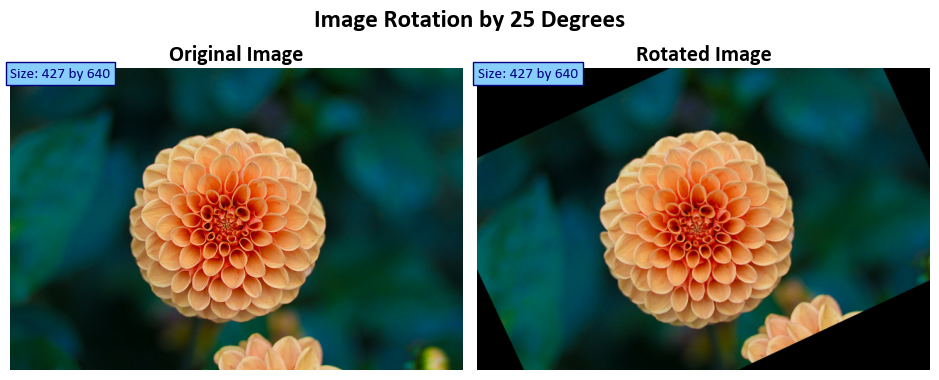

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image

# Load the sample image
Img = load_sample_image('flower.jpg')

# Rotate the image by 25 degrees
rows, cols, _ = Img.shape
angle = 25  # Specify the rotation angle
scale = 1.0  # Scale factor (1.0 maintains the original size)
rotation_center = (cols // 2, rows // 2)  # Center of the image

# Get the rotation matrix using cv2.getRotationMatrix2D
M = cv2.getRotationMatrix2D(rotation_center, angle, scale)
print('Affine Transformation Matrix (M) =', M)

# Apply the affine transformation to the image using warpAffine
Out = cv2.warpAffine(Img, M, (cols, rows))  # Transformed image

# Display the original and rotated images
fig, ax = ImShow([Img, Out],
                 ['Original Image', 'Rotated Image'],
                 title=f'Image Rotation by {angle} Degrees')

# Add text indicating the size of the original and transformed images
_ = ax[0].text(x=0, y=int(0.02 * Img.shape[1]), s=f'Size: {Img.shape[0]} by {Img.shape[1]}',
               size=11, color='Navy', bbox=dict(boxstyle="square", ec='Navy', fc='LightSkyBlue'))
_ = ax[1].text(x=0, y=int(0.02 * Out.shape[1]), s=f'Size: {Out.shape[0]} by {Out.shape[1]}',
               size=11, color='Navy', bbox=dict(boxstyle="square", ec='Navy', fc='LightSkyBlue'))

Based on the provided values of $\theta = 25$ (in degrees) and $\text{scale} = 1$, the resulting 2D rotation matrix $M$ can be calculated as follows:

\begin{equation}
\begin{bmatrix}
\alpha & \beta & (1 - \alpha) \cdot \text{center.x} - \beta \cdot \text{center.y} \\
- \beta & \alpha & \beta \cdot \text{center.x} + (1 - \alpha) \cdot \text{center.y}
\end{bmatrix}
\end{equation}

Where:

- $\alpha = \text{scale} \cdot \cos(\theta)$
- $\beta = \text{scale} \cdot \sin(\theta)$

Given that $\theta = 25$ degrees and $\text{scale} = 1$, you can calculate $\alpha$ and $\beta$ as follows:

\begin{equation}
\alpha = 1 \cdot \cos(25^\circ) \approx 0.90630779
\end{equation}

\begin{equation}
\beta = 1 \cdot \sin(25^\circ) \approx 0.42261826
\end{equation}

Now, you can calculate the elements of the rotation matrix $M$ using these values and the center point:

\begin{equation}
M = \begin{bmatrix}
0.90630779 & 0.42261826 & (1 - 0.90630779) \cdot \text{center.x} - 0.42261826 \cdot \text{center.y} \\
-0.42261826 & 0.90630779 & 0.42261826 \cdot \text{center.x} + (1 - 0.90630779) \cdot \text{center.y}
\end{bmatrix}
\end{equation}

The resulting matrix $M$ will be:

\begin{equation}
M = \begin{bmatrix}
0.90630779 & 0.42261826 & -60.0361816 \\
-0.42261826 & 0.90630779 & 155.19428512
\end{bmatrix}
\end{equation}

This is the 2D rotation matrix $M$ corresponding to a rotation angle of 25 degrees and a scale factor of 1.

***

This code performs image rotation using OpenCV in Python. Here's a step-by-step explanation:

1. **Importing Libraries**: The code begins by importing the necessary libraries:
   - `cv2`: OpenCV, a popular computer vision library.
   - `numpy` as `np`: NumPy, used for numerical operations.
   - `matplotlib.pyplot` as `plt`: Matplotlib, used for plotting.
   - `load_sample_image` from `sklearn.datasets`: This function is used to load a sample image from the scikit-learn dataset.

2. **Loading an Image**: The code loads a sample image named 'flower.jpg' using the `load_sample_image` function. It also determines the image's dimensions (number of rows and columns) and stores them in the variables `rows` and `cols`.

3. **Defining Rotation Parameters**:
   - `angle`: Specifies the rotation angle, which is set to 25 degrees in this example.
   - `scale`: Defines the scale factor. A scale of 1.0 maintains the original size.
   - `rotation_center`: Specifies the center of rotation as a tuple (x, y). In this case, it's set to the center of the image.

4. **Calculating the Rotation Matrix (`M`)**: The code uses the `cv2.getRotationMatrix2D` function to compute the affine transformation matrix for rotation. It takes the `rotation_center`, `angle`, and `scale` as arguments and returns the transformation matrix `M`. The calculated matrix is printed.

5. **Applying the Rotation**: The `cv2.warpAffine` function is used to apply the affine transformation to the image. It takes the input image `Img`, the transformation matrix `M`, and the output image dimensions `(cols, rows)` as arguments. The result is stored in the variable `Out`.

6. **Displaying the Images**:
   - The code uses Matplotlib to create a figure and two subplots for displaying the original and rotated images.
   - The original image (`Img`) and the rotated image (`Out`) are displayed side by side.
   - The titles 'Original Image' and 'Rotated Image' are added to the subplots.
   - Text is added below each image to indicate its size in the format 'Size: height by width'.

## Resizing Images with OpenCV

The `resize` function in OpenCV is a versatile tool for adjusting the size of images, whether making them smaller or larger. It offers several options for defining the output size or using scaling factors to control the resizing process, providing the flexibility needed for various image manipulation tasks {cite:p}`opencv_library, OpenCVDocumentation`.

**Key Concepts:**

The `resize` function is essential for handling image dimensions. Here's a breakdown of its capabilities:

1. **Resizing an Image:**
   The primary purpose of `resize` is to change the size of an image. This can involve reducing or increasing the image's dimensions. The function allows explicit size specification or resizing based on scaling factors (`fx` and `fy`). Importantly, the initial type or size of the output image (`dst`) is not used. Instead, it's determined based on the source image (`src`), the desired output size (`dsize`), and the specified scaling factors.

2. **Explicit Output Size:**
   If you want to resize `src` to fit a pre-created destination image `dst`, you can achieve this by calling the function as follows:
   ```python
   resize(src, dst, dst.size(), 0, 0, interpolation)
   ```
   Here, `dsize` is set to match the size of `dst`, and the scaling factors `fx` and `fy` are automatically computed based on that.

3. **Using Scaling Factors:**
   You can also use scaling factors to control the resizing process. For instance, to decrease the size of the image by a factor of 2 in both the horizontal and vertical directions (decimation), you can use the following approach:
   ```python
   resize(src, dst, Size(), 0.5, 0.5, interpolation)
   ```
   Here, `fx` and `fy` are explicitly specified, and the function calculates the destination image size based on these factors.

4. **Selecting Interpolation:**
   When shrinking an image, the `INTER_AREA` interpolation method is recommended for the best results in terms of image quality. On the other hand, when enlarging an image, using `INTER_CUBIC` (higher quality, but slower) or `INTER_LINEAR` (faster but still acceptable quality) interpolation methods is generally recommended.

**Function Parameters:**

- `src`: The input image to be resized.
- `dst`: The output image. Its size can be explicitly set using `dsize`, or it can be determined automatically based on `src.size()`, `fx`, and `fy`. The type of `dst` matches the type of `src`.
- `dsize`: The desired output image size. If set to zero (None in Python), the function calculates it as:
  ```
  dsize = Size(round(fx * src.cols), round(fy * src.rows))
  ```
  Either `dsize` or both `fx` and `fy` must be non-zero.
- `fx`: The scaling factor along the horizontal axis (width). If `fx` is 0, it's computed as `(double)dsize.width / src.cols`.
- `fy`: The scaling factor along the vertical axis (height). If `fy` is 0, it's computed as `(double)dsize.height / src.rows`.
- `interpolation`: The interpolation method used during the resizing operation (e.g., `INTER_NEAREST`, `INTER_LINEAR`, `INTER_CUBIC`, `INTER_LANCZOS4`).

The `resize` function allows you to resize images while maintaining control over the output size and selecting appropriate interpolation methods to achieve the desired quality.

**Syntax:**

```
cv2.resize(src, dsize[, dst[, fx[, fy[, interpolation]]]]) → dst
```

Here's what each parameter does:

1. `src`: The input image that you want to resize. It should be a NumPy array (image) in most cases.

2. `dsize`: The desired size (width and height) of the output image. It's specified as a tuple (width, height). If you provide this parameter, the `fx` and `fy` parameters (scaling factors) are ignored.

3. `dst` (optional): The output image where the resized image will be stored. If not provided, a new image will be created to store the result.

4. `fx` (optional): The scale factor along the horizontal axis (width) by which you want to resize the image. If you provide `fx`, the `dsize` parameter is ignored on that axis.

5. `fy` (optional): The scale factor along the vertical axis (height) by which you want to resize the image. If you provide `fy`, the `dsize` parameter is ignored on that axis.

6. `interpolation` (optional): The interpolation method to be used during the resizing operation. Interpolation determines how pixel values are computed for the output image based on the input image. Common interpolation methods include:

   - `cv2.INTER_NEAREST`: Nearest-neighbor interpolation (fast but may produce blocky results).
   - `cv2.INTER_LINEAR`: Bilinear interpolation (good for most general-purpose resizing).
   - `cv2.INTER_CUBIC`: Bicubic interpolation (better quality, but slower).
   - `cv2.INTER_LANCZOS4`: Lanczos interpolation (high-quality but slower).

The `cv2.resize()` function resizes the input image based on the specified size or scaling factors and the chosen interpolation method. The function returns the resized image, and if you provided the `dst` parameter, the resized image is stored in the `dst` array; otherwise, a new image is created and returned. The `dst` parameter allows you to reuse an existing image array for efficiency.

<font color='Blue'><b>Example:</b></font> In this example, we'll explore an image processing task that involves resizing an image using cubic interpolation. Cubic interpolation is a method for resizing images while maintaining smooth transitions between pixels. We'll load a sample image, apply the resizing operation, and visualize both the original and resized images. Additionally, we'll add text annotations to display the sizes of the original and resized images for reference.

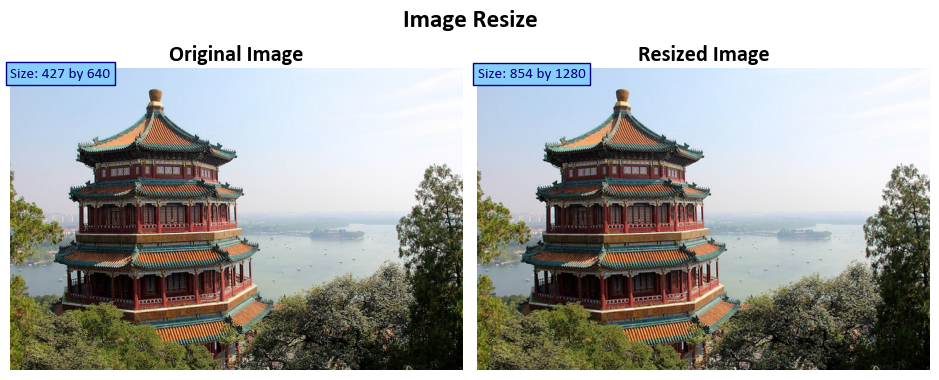

In [12]:
# Load the sample image 'china.jpg'
Img = load_sample_image('china.jpg')
                        
# Resize the original image using cubic interpolation
Out = cv2.resize(Img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

# Display the original and resized images with titles
fig, ax = ImShow([Img, Out], ['Original Image', 'Resized Image'], title='Image Resize')

# Add text indicating the size of the original and resized images
_ = ax[0].text(x=0, y=int(0.02 * Img.shape[1]), s=f'Size: {Img.shape[0]} by {Img.shape[1]}',
               size=11, color='Navy', bbox=dict(boxstyle="square", ec='Navy', fc='LightSkyBlue'))
_ = ax[1].text(x=0, y=int(0.02 * Out.shape[1]), s=f'Size: {Out.shape[0]} by {Out.shape[1]}',
               size=11, color='Navy', bbox=dict(boxstyle="square", ec='Navy', fc='LightSkyBlue'))

This code demonstrates how to load an image, resize it using cubic interpolation, and then display both the original and resized images with their sizes indicated in the plots. Here's a breakdown of the code:

1. **Load the Sample Image**: This line loads a sample image named 'china.jpg' using the `load_sample_image` function.

2. **Resize the Image**: The next line resizes the original image (`Img`) using cubic interpolation. It doubles the size of the image both horizontally (`fx=2`) and vertically (`fy=2`) and specifies cubic interpolation as the method (`interpolation=cv2.INTER_CUBIC`). The result is stored in the `Out` variable.

3. **Display Original and Resized Images**: This code segment uses a function called `ImShow` to display the original and resized images side by side. The original image is labeled as 'Original Image', and the resized image is labeled as 'Resized Image'. The title of this plot is set to 'Image Resize'.

4. **Add Text Indicating Image Sizes**: The next two lines add text to the images. It displays the sizes of the original and resized images. These lines use f-strings to format the text dynamically based on the dimensions of the images.

   - For the original image (`ax[0]`), it calculates the text position based on 2% of the image's height (`int(0.02 * Img.shape[1])`). The size, color, and appearance of the text are specified as well.
   
   - Similarly, for the resized image (`ax[1]`), it calculates the text position based on 2% of the resized image's height (`int(0.02 * Out.shape[1])`).

## Warp Perspective

The `cv2.warpPerspective()` function in the Python OpenCV library is a powerful tool used for performing perspective transformations on an input image. These transformations allow you to change the perspective view of an object within an image, simulating effects like changing the viewpoint or correcting for distortions caused by the camera's perspective. The primary purpose of this function is to apply a given 3x3 transformation matrix to the input image, resulting in a transformed output image {cite:p}`opencv_library, OpenCVDocumentation`.

**Perspective Transformation**

Perspective transformations are essential for various computer vision tasks, including image rectification, object recognition, and more. They involve manipulating the positions of points in an image, effectively warping the image based on a specified transformation matrix. This matrix, denoted as `M`,
\begin{equation}
M = \begin{bmatrix} M_{11} & M_{12} & M_{13} \\M_{21} & M_{22} & M_{23}  \\M_{31} & M_{32} & M_{33} \end{bmatrix}
\end{equation}

describes how the points in the source image (`src`) should be transformed to obtain their corresponding positions in the destination image (`dst`).

The transformation is defined by the following equation:

\begin{equation}
\texttt{dst} (x,y) = \texttt{src} \left ( \frac{M_{11} x + M_{12} y + M_{13}}{M_{31} x + M_{32} y + M_{33}} , \frac{M_{21} x + M_{22} y + M_{23}}{M_{31} x + M_{32} y + M_{33}} \right )
\end{equation}

When the flag `WARP_INVERSE_MAP` is set, the function uses the inverse of the transformation matrix for the calculation. Otherwise, the transformation is inverted using the `invert` function before being applied. The function does not operate in-place; it generates a new transformed image as the output.

**Parameters**

Here's a detailed explanation of the parameters used in the `cv2.warpPerspective()` function:

- `src`: This parameter represents the input image you want to transform using the perspective transformation. It should be a numpy array, representing the image you wish to warp.

- `M`: The `M` parameter is a 3x3 transformation matrix that defines the perspective transformation. This matrix describes how the points in the source image (`src`) should be transformed to obtain the corresponding points in the destination image (`dst`).

- `dsize`: The `dsize` parameter specifies the size of the output image (`dst`). It is a tuple containing the width and height of the destination image. The transformed input image (`src`) will be resized to this size.

- `dst` (optional): The `dst` parameter serves as the output image where the result of the perspective transformation will be stored. If this parameter is not provided, a new image will be created to hold the transformed result.

- `flags` (optional): The `flags` parameter provides additional transformation options. It can be a combination of transformation flags, but it is often set to `cv2.INTER_LINEAR` for bilinear interpolation, which provides a good trade-off between speed and quality.

- `borderMode` (optional): The `borderMode` parameter specifies how the border of the output image (`dst`) should be filled. It can be set to different border modes, such as `cv2.BORDER_CONSTANT` or `cv2.BORDER_REPLICATE`, depending on the desired behavior.

- `borderValue` (optional): The `borderValue` parameter is used to specify the value used for padding if the `borderMode` is set to `cv2.BORDER_CONSTANT`.

**Function Signature**

Here's the structure of the function signature:

```
cv2.warpPerspective(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]]) -> dst
```

**Usage and Importance**

The `cv2.warpPerspective()` function is a fundamental component in many image processing pipelines. It enables handling perspective effects, correcting image distortions, and preparing images for further analysis or visualization. By understanding and utilizing perspective transformations, you can significantly enhance the capabilities of your computer vision applications.

For more detailed information and examples of using `warpPerspective`, you can refer to the [OpenCV documentation](https://docs.opencv.org/2.4/modules/imgproc/doc/geometric_transformations.html#cv2.warpPerspective) and the [function description](https://docs.opencv.org/3.4/da/d54/group__imgproc__transform.html#gaf73673a7e8e18ec6963e3774e6a94b87). This function is essential for tasks that require precise geometric adjustments in images, making it a valuable tool in various computer vision scenarios.

<font color='Blue'><b>Example</b></font>: In this example, we explore perspective transformation, a crucial concept in image processing. We define source and destination points to describe how we want to alter the image's perspective. Using these points, we calculate a transformation matrix (M). Then, we apply this matrix to the input image, transforming its perspective. We visualize both the original and transformed images, including annotations for size reference and marked points to show the transformation's effect.

M = [[ 1.52835807e+00  1.43283569e-01 -8.50149178e+01]
 [ 5.25237016e-02  1.57571105e+00 -9.71688479e+01]
 [ 3.13555899e-04  6.58838004e-04  1.00000000e+00]]


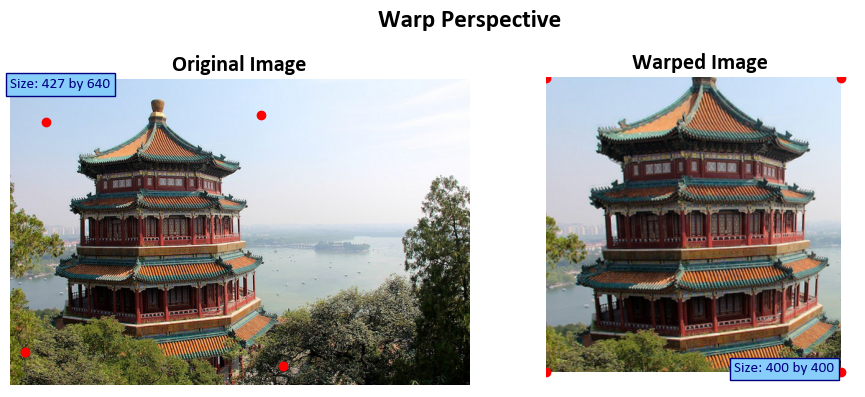

In [17]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Define the source and destination points for perspective transformation
src_pts = np.float32([[50, 60], [350, 50], [20, 380], [380, 400]])  # Source points
dst_pts = np.float32([[0, 0], [400, 0], [0, 400], [400, 400]])  # Destination points

# Calculate the perspective transformation matrix
M = cv2.getPerspectiveTransform(src_pts, dst_pts)

# Apply the perspective transformation to the input image
Out = cv2.warpPerspective(Img, M, dsize = (400, 400))
print('M =', M)

# Display the original and transformed images with titles
fig, ax = ImShow([Img, Out], ['Original Image', 'Warped Image'], title='Warp Perspective')

# Add text to indicate the size of the original and transformed images
_ = ax[0].text(x=0, y=int(0.02 * Img.shape[1]), s=f'Size: {Img.shape[0]} by {Img.shape[1]}',
               size=11, color='Navy', bbox=dict(boxstyle="square", ec='Navy', fc='LightSkyBlue'))
_ = ax[1].text(x=int(0.6 * Img.shape[0]), y=Out.shape[1], s=f'Size: {Out.shape[0]} by {Out.shape[1]}',
               size=11, color='Navy', bbox=dict(boxstyle="square", ec='Navy', fc='LightSkyBlue'))

# Mark the source and destination points on the images
_ = ax[0].scatter(src_pts[:, 0], src_pts[:, 1], color='red')  # Mark source points on the original image
_ = ax[1].scatter(dst_pts[:, 0], dst_pts[:, 1], color='red')  # Mark destination points on the transformed image

This code performs a perspective transformation on an input image using OpenCV. Let's break down the code step by step:

1. **Import Libraries**:
   - `numpy` is imported as `np` for numerical operations.
   - `cv2` is imported for computer vision functions.
   - `matplotlib.pyplot` is imported as `plt` for image visualization.

2. **Define Source and Destination Points**:
   - `src_pts` is a numpy array representing the source points for the perspective transformation. These are the coordinates of four points in the original image that define a region of interest.
   - `dst_pts` is a numpy array representing the destination points for the perspective transformation. These are the coordinates to which the source points will be mapped, defining how the region of interest should be transformed.

3. **Calculate Perspective Transformation Matrix (`M`)**:
   - `cv2.getPerspectiveTransform(src_pts, dst_pts)` calculates the perspective transformation matrix `M` based on the source and destination points. This matrix describes the transformation that maps the source points to the destination points.

4. **Apply Perspective Transformation**:
   - `cv2.warpPerspective(Img, M, (400, 400))` applies the perspective transformation to the input image `Img`. The transformed image is stored in the variable `Out`. The `(400, 400)` argument specifies the size of the output image.

5. **Display Original and Transformed Images**:
   - `ImShow` (not defined in the provided code) is used to display the original and transformed images side by side. It also sets titles for the images.

6. **Add Text Indicating Image Sizes**:
   - Text annotations are added to the images using `ax.text`. These annotations display the size of the original and transformed images. The size information is obtained from the shape of the respective images.

7. **Mark Source and Destination Points**:
   - Source points are marked on the original image using `ax[0].scatter`. They are visualized as red points.
   - Destination points are marked on the transformed image using `ax[1].scatter`. They are also visualized as red points.

## Camera Calibration (Optional Section)

In computer vision, camera calibration is a crucial process that aims to correct lens distortions and determine intrinsic and extrinsic camera parameters. Cameras often introduce two significant types of distortion: radial distortion and tangential distortion {cite:p}`opencv_library, OpenCVDocumentation`.

**Radial Distortion**: Radial distortion causes straight lines to appear curved. It becomes more pronounced the farther points are from the center of the image. For instance, in the image below, the red lines indicate expected straight lines on the chessboard, but they appear distorted. This distortion is especially noticeable along the chessboard's edges, which curve outward.

```{figure} calib_radial.jpg
---
width: 350px
align: center
---
Image courtesy of {cite:p}`OpenCVDocumentation`.
```

Mathematically, radial distortion can be represented as follows:
\begin{equation}
x_{\text{distorted}} = x \times (1 + k_1 r^2 + k_2 r^4 + k_3 r^6)
\end{equation}
\begin{equation}
y_{\text{distorted}} = y \times (1 + k_1 r^2 + k_2 r^4 + k_3 r^6)
\end{equation}

**Tangential Distortion**: Tangential distortion arises when the camera's imaging lens is not perfectly aligned parallel to the imaging plane. This can cause certain areas in the image to appear closer than expected. The amount of tangential distortion can be represented as:
\begin{equation}
x_{\text{distorted}} = x + (2p_1xy + p_2(r^2 + 2x^2))
\end{equation}
\begin{equation}
y_{\text{distorted}} = y + (p_1(r^2 + 2y^2) + 2p_2xy)
\end{equation}

To correct these distortions, five distortion coefficients are needed:
\begin{equation}
\text{Distortion coefficients} = (k_1, k_2, p_1, p_2, k_3)
\end{equation}

In addition to distortion coefficients, camera calibration requires knowledge of intrinsic and extrinsic parameters. **Intrinsic parameters** are specific to a camera and include focal length ($f_x$, $f_y$) and optical centers ($c_x$, $c_y$). These parameters contribute to the camera matrix, which is used to rectify lens distortions. The camera matrix, expressed as a 3x3 matrix, is defined as:
\begin{equation}
\text{camera matrix} = \begin{bmatrix} f_x & 0 & c_x \\ 0 & f_y & c_y \\ 0 & 0 & 1 \end{bmatrix}
\end{equation}

**Extrinsic parameters** correspond to rotation and translation vectors, mapping a 3D point's coordinates to a coordinate system.

To perform camera calibration, sample images of a well-defined pattern (e.g., a chessboard) are required. By identifying known points in both the real world and the image, distortion coefficients can be computed. For accurate results, at least 10 test patterns are recommended.

**Correcting Lens Distortion with `cv2.undistort()`**

The `cv2.undistort()` function in the Python OpenCV library serves as a powerful tool for addressing lens distortion present in input images. Lens distortion is a common concern in photography, arising from the inherent curvature of camera lenses. This distortion can significantly impact image accuracy, making it particularly relevant in computer vision applications. The function provides a means to rectify lens-induced distortions, leveraging a specified camera calibration that includes both the camera matrix and distortion coefficients {cite:p}`opencv_library, OpenCVDocumentation`.

Here's a comprehensive explanation of the function's parameters and its primary purpose:

- `src`: This parameter corresponds to the input image you intend to undistort, typically containing distortions resulting from lens effects. It should be represented as a numpy array, serving as the image you wish to correct.

- `cameraMatrix`: The `cameraMatrix` parameter represents a 3x3 matrix, serving as the intrinsic matrix of the camera. It holds essential information about the camera's focal length, principal point, and other vital calibration parameters. This matrix plays a crucial role in the undistortion process.

- `distCoeffs`: The `distCoeffs` parameter encompasses distortion coefficients that succinctly describe the lens distortion effects. These coefficients are typically determined during camera calibration and are crucial for modeling both radial and tangential distortions.

- `dst` (optional): The `dst` parameter serves as the output image container, where the undistorted result will be stored. If this parameter is not provided, the function creates a new image specifically to hold the undistorted version.

- `newCameraMatrix` (optional): The `newCameraMatrix` parameter is an additional, optional parameter. It allows you to specify a new camera matrix for the undistorted image. This parameter gives you control over the output image's aspect ratio or focal length, offering flexibility in customization.

**Function Signature**

Here's the structure of the function signature:

```
cv2.undistort(src, cameraMatrix, distCoeffs[, dst[, newCameraMatrix]]) -> dst
```

**Importance in Computer Vision**

Lens distortion correction plays a pivotal role in various computer vision tasks, such as object tracking, feature matching, and 3D reconstruction. By applying the `cv2.undistort()` function, you can obtain undistorted images that more accurately represent the real-world scene, significantly enhancing the reliability and accuracy of subsequent computer vision operations.

This function is a critical component of the camera calibration process, where the camera matrix and distortion coefficients are determined through calibration techniques. These parameters are then employed to eliminate distortion effects from captured images, resulting in improved precision in subsequent computer vision tasks.

For more comprehensive information and practical examples of using the `undistort` function, you can refer to the [OpenCV documentation](https://docs.opencv.org/2.4/modules/imgproc/doc/geometric_transformations.html#cv2.undistort). A solid understanding and effective utilization of lens distortion correction are essential skills for achieving high-quality results in computer vision applications that involve image analysis using cameras with distortion.

<font color='Blue'><b>Example:</b></font>

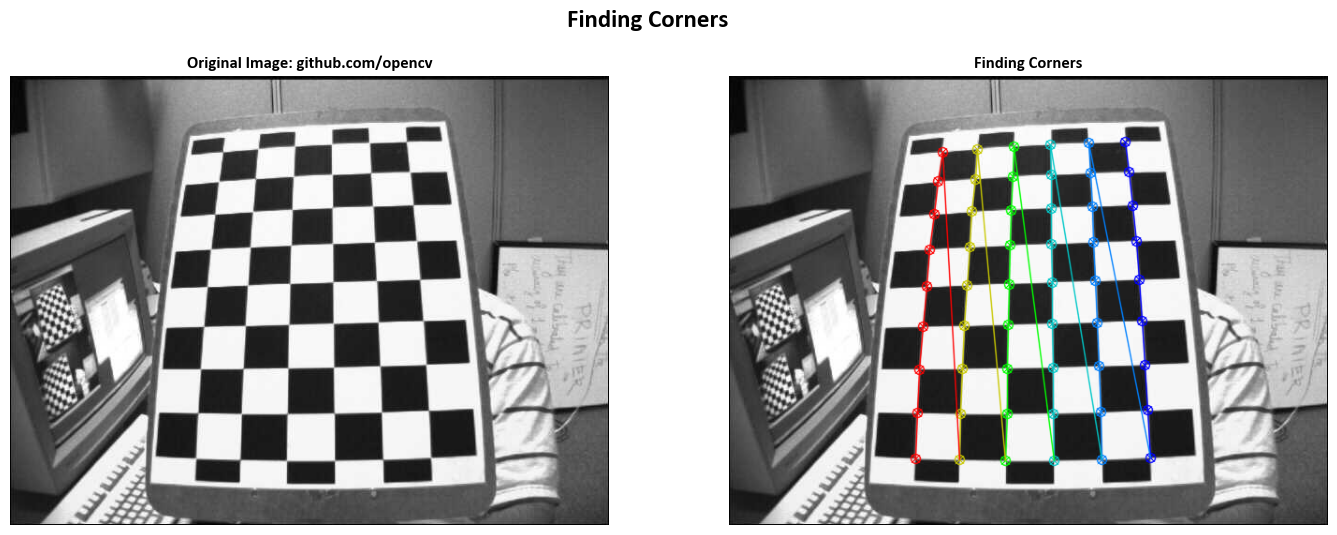

In [7]:
from skimage import io
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the image from the given URL and convert it to RGB format
Img = io.imread('https://github.com/opencv/opencv/blob/fc1a15626226609babd128e043cf7c4e32f567ca/samples/data/left12.jpg?raw=true')
Img = cv2.cvtColor(Img, cv2.COLOR_GRAY2RGB)

# Create a subplot for displaying original and processed images
fig, ax = plt.subplots(1, 2, figsize=(17, 6))
ax = ax.ravel()

# Set the title for the overall figure
_ = fig.suptitle('Finding Corners', weight = 'bold', fontsize=18)

# Display the original image on the left subplot
_ = ax[0].imshow(Img)
_ = ax[0].set_title('Original Image: github.com/opencv', weight = 'bold', fontsize=12)

# Termination criteria for corner refinement
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# Number of inside corners along x and y directions on the chessboard
nx = 9
ny = 6

# Convert the image to grayscale
gray = cv2.cvtColor(Img, cv2.COLOR_BGR2GRAY)

# Prepare object points in the chessboard pattern
objp = np.zeros((nx*ny, 3), np.float32)
objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1, 2)

# Arrays to store object points and image points from the chessboard
objpoints = []  # 3D points in real world space
imgpoints = []  # 2D points in image plane

# Find the chessboard corners
ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

# If corners are found, refine and draw them
if ret == True:
    objpoints.append(objp)
    
    # Draw and display the corners on the image
    cv2.drawChessboardCorners(Img, (nx, ny), corners, ret)
    _ = ax[1].imshow(Img)
    
    # Refine the corner positions
    corners2 = cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)
    imgpoints.append(corners2)

# Set the title for the right subplot
_ = ax[1].set_title('Finding Corners', weight = 'bold', fontsize=12)

# Configure plot settings for both subplots
for i in range(2):
    _ = ax[i].set_aspect(1)
    _ = ax[i].axis('off')

# Show the plots
plt.show()

This code demonstrates the process of finding and refining the corners of a chessboard pattern in an image using Python with OpenCV and Matplotlib. Here's a step-by-step explanation of the code:

1. **Import Libraries**:
   - `skimage.io` is imported as `io` for reading the image from a URL.
   - `numpy` is imported as `np` for numerical operations.
   - `cv2` is imported for computer vision functions.
   - `matplotlib.pyplot` is imported as `plt` for image visualization.

2. **Load and Convert Image**:
   - The code loads an image from a given URL using `io.imread`.
   - The loaded image is initially in grayscale format, so it is converted to RGB format using `cv2.cvtColor`.

3. **Create Subplots**:
   - A subplot with two columns is created using `plt.subplots(1, 2, figsize=(17, 6))`. This subplot will display the original and processed images side by side.
   - Titles for the overall figure and the two subplots are set using `fig.suptitle` and `ax[0].set_title` and `ax[1].set_title`.

4. **Display Original Image**:
   - The original image is displayed on the left subplot using `ax[0].imshow`.
   - A title is set for the left subplot.

5. **Termination Criteria**:
   - `criteria` is defined as `(cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)`. These criteria are used for corner refinement.

6. **Chessboard Parameters**:
   - `nx` and `ny` represent the number of inside corners along the x and y directions on the chessboard.

7. **Convert to Grayscale**:
   - The loaded image is converted to grayscale using `cv2.cvtColor`, and the result is stored in the variable `gray`.

8. **Prepare Object Points**:
   - `objp` is a numpy array that stores the object points in the chessboard pattern. It's initialized as zeros and then filled with the grid of points on the chessboard.

9. **Arrays for Object and Image Points**:
   - `objpoints` and `imgpoints` are empty lists that will be used to store 3D points in real-world space and 2D points in the image plane, respectively.

10. **Find Chessboard Corners**:
    - `cv2.findChessboardCorners` is used to find the corners of the chessboard in the grayscale image. The result is stored in `ret` and `corners`.

11. **Draw and Refine Corners**:
    - If corners are found (`ret == True`), the code appends the object points to `objpoints`.
    - It then draws the chessboard corners on the original image using `cv2.drawChessboardCorners` and displays the result on the right subplot.
    - The corners are refined using `cv2.cornerSubPix`, and the refined corners are appended to `imgpoints`.

12. **Set Titles and Plot Settings**:
    - Titles are set for the right subplot.
    - Aspect ratios are set to 1, and axis display is turned off for both subplots.

13. **Show Plots**:
    - Finally, the plots are displayed using `plt.show()`.

### cv2.calibrateCamera() function

For the calibration process, the essential tool at our disposal is the [cv2.calibrateCamera()](https://docs.opencv.org/2.4/modules/calib3d/doc/camera_calibration_and_3d_reconstruction.html#calibratecamera) function. This function plays a pivotal role in camera calibration, providing a comprehensive set of results, including the camera matrix, distortion coefficients, as well as rotation and translation vectors, among other critical information. The function serves as the cornerstone for calibrating a camera system, enabling accurate and reliable image analysis in computer vision applications {cite:p}`opencv_library, OpenCVDocumentation`.

Through the `cv2.calibrateCamera()` function, we gain access to the following essential parameters:

- **Camera Matrix**: The camera matrix, which is crucial for undistorting images and contains critical information about the camera's intrinsic properties, such as focal length, principal point, and more.

- **Distortion Coefficients**: These coefficients capture the distortion effects induced by the camera's lens, allowing us to model and correct for both radial and tangential distortions.

- **Rotation and Translation Vectors**: These vectors are integral in translating 3D coordinates to a camera's coordinate system. They play a fundamental role in tasks involving 3D reconstruction and object tracking.

In addition to these core parameters, the `cv2.calibrateCamera()` function may provide other valuable information that is pertinent to the camera's geometric calibration and 3D reconstruction capabilities. The precise determination of these parameters significantly enhances the accuracy and reliability of subsequent computer vision operations.

This function empowers us to calibrate the camera system based on a set of carefully selected calibration images and corresponding known 3D points. By leveraging this calibration data, we can extract the camera's intrinsic and extrinsic properties, paving the way for more precise and consistent image analysis.

For in-depth guidance on how to utilize the `cv2.calibrateCamera()` function and to better understand the process of camera calibration, you can refer to the [OpenCV documentation](https://docs.opencv.org/2.4/modules/calib3d/doc/camera_calibration_and_3d_reconstruction.html#calibratecamera). Mastering the art of camera calibration is essential for achieving accurate and reliable results in computer vision applications, particularly those involving 3D reconstruction and precise spatial analysis.

<font color='Blue'><b>Example:</b></font>

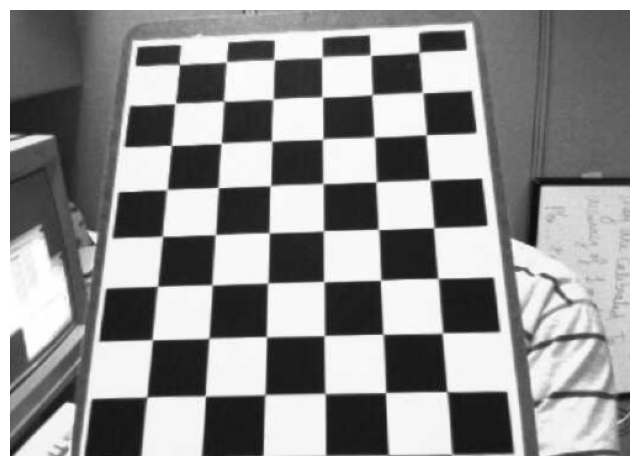

In [8]:
import cv2
import matplotlib.pyplot as plt
from skimage import io

# Calibrate the camera using object points and image points
# 'objpoints' and 'imgpoints' are provided
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

# Load the image from the given URL and convert it to RGB color
Img = io.imread('https://github.com/opencv/opencv/blob/fc1a15626226609babd128e043cf7c4e32f567ca/samples/data/left12.jpg?raw=true')
Img = cv2.cvtColor(Img, cv2.COLOR_GRAY2RGB)

# Get the dimensions of the image
h, w = Img.shape[:2]

# Get the optimal new camera matrix and the region of interest (ROI) for undistortion
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w, h), 1, (w, h))

# Undistort the image using the computed transformation
mapx, mapy = cv2.initUndistortRectifyMap(mtx, dist, None, newcameramtx, (w, h), 5)
dst = cv2.remap(Img, mapx, mapy, cv2.INTER_LINEAR)

# Crop the image based on the computed ROI
x, y, w, h = roi
Out = dst[y:y+h, x:x+w]

# Display the undistorted and cropped image using matplotlib
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
_ = ax.imshow(Out)
_ = ax.set_aspect(1)  # Set the aspect ratio to 1 to avoid distortion
_ = ax.axis('off')  # Turn off axis labels and ticks

This code demonstrates the process of camera calibration and image undistortion using OpenCV and Matplotlib. Here's an explanation of each part of the code:

1. Import necessary libraries:
   - `cv2`: OpenCV library for computer vision tasks.
   - `matplotlib.pyplot`: Matplotlib library for plotting.
   - `skimage.io`: Part of the scikit-image library for image processing.

2. Camera Calibration:
   - `cv2.calibrateCamera`: This function calibrates the camera using object points (`objpoints`) and image points (`imgpoints`) obtained from a set of calibration images. It calculates the camera matrix (`mtx`) and distortion coefficients (`dist`) along with other parameters such as rotation vectors (`rvecs`) and translation vectors (`tvecs`).

3. Load and Convert Image:
   - `io.imread`: Loads an image from a given URL.
   - `cv2.cvtColor`: Converts the loaded image from grayscale to RGB format. The loaded image appears to be grayscale initially.

4. Image Dimensions:
   - `Img.shape`: Obtains the dimensions (height and width) of the image.

5. Optimal New Camera Matrix and ROI:
   - `cv2.getOptimalNewCameraMatrix`: Computes an optimal new camera matrix (`newcameramtx`) for undistorting the image while preserving as much of the original image as possible. It also returns a region of interest (`roi`) within the new image.
   
6. Undistort Image:
   - `cv2.initUndistortRectifyMap`: Initializes the undistortion transformation by computing a mapping (`mapx` and `mapy`) from distorted image coordinates to undistorted image coordinates.
   - `cv2.remap`: Applies the undistortion transformation to the input image using the computed mapping. The resulting image is stored in `dst`.

7. Crop Image:
   - Using the `roi` obtained earlier, the code extracts a region of interest from the undistorted image to remove any black borders or empty areas caused by undistortion. The cropped image is stored in `Out`.

8. Display Result:
   - Matplotlib is used to create a figure and display the undistorted and cropped image (`Out`) in a subplot.
   - `ax.set_aspect(1)` ensures that the aspect ratio is maintained to prevent distortion when displaying the image.
   - `ax.axis('off')` turns off axis labels and ticks for a cleaner display.